In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2022-11-03 05:48:22.105610: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/gpfsm/ccds01/home/appmgr/app/jupyterhub/ilab/kernel/lib/python3.7/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  RequestsDependencyWarning)


## Exploratory Data Analysis

Lets explore the data in this section and get an idea of what the values from the training dataset bring.

In [2]:
gpkg_filenames = [
    '/explore/nobackup/projects/3sl/labels/landuse/Tappan09_WV03_20190319_M1BS_104001004A1FF400_data-cog_epsg103528.gpkg'
]

In [3]:
def merge_gdfs(filenames):
    gdfs = []
    for filename in filenames:
        gdfs.append(gpd.read_file(filename))
    return pd.concat(gdfs, axis=1)

In [17]:
gdf = merge_gdfs(gpkg_filenames)
gdf['id'].unique(), gdf['id'].value_counts()

(array([1, 2, 3, 4]),
 1    100
 3     22
 2     18
 4      6
 Name: id, dtype: int64)

In [5]:
gdf.columns

Index(['id', 'mean_2019_jan', 'mean_2019_feb', 'mean_2019_mar',
       'mean_2019_apr', 'mean_2019_may', 'mean_2019_jun', 'mean_2019_jul',
       'mean_2019_aug', 'mean_2019_sep', 'mean_2019_oct', 'mean_2019_nov',
       'mean_2019_dec', 'mean_2017_jan', 'mean_2017_feb', 'mean_2017_mar',
       'mean_2017_apr', 'mean_2017_may', 'mean_2017_jun', 'mean_2017_jul',
       'mean_2017_aug', 'mean_2017_sep', 'mean_2017_oct', 'mean_2017_nov',
       'mean_2017_dec', 'mean_2021_jan', 'mean_2021_feb', 'mean_2021_mar',
       'mean_2021_apr', 'mean_2021_may', 'mean_2021_jun', 'mean_2021_jul',
       'mean_2021_aug', 'mean_2021_sep', 'mean_2021_oct', 'mean_2021_nov',
       'mean_2021_dec', 'mean_2018_jan', 'mean_2018_feb', 'mean_2018_mar',
       'mean_2018_apr', 'mean_2018_may', 'mean_2018_jun', 'mean_2018_jul',
       'mean_2018_aug', 'mean_2018_sep', 'mean_2018_oct', 'mean_2018_nov',
       'mean_2018_dec', 'mean_2020_jan', 'mean_2020_feb', 'mean_2020_mar',
       'mean_2020_apr', 'mean_2020_m

In [6]:
gdf.shape

(146, 74)

In [7]:
gdf = gdf.sample(frac=1, random_state=24)
gdf.isnull().values.any()
gdf.shape

(146, 74)

### Plot Some Occurrences for Several Class=1 Observations

### Plot Some Occurrences for Several Class=2 Observations

### Plot Some Occurrences for Several Class=3 Observations

## Preprocess Dataset

Here we divide the dataset and preprocess the features.

In [8]:
y = np.ravel(gdf['id'] - 1)
X = gdf.drop(['id', 'geometry'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,mean_2019_jan,mean_2019_feb,mean_2019_mar,mean_2019_apr,mean_2019_may,mean_2019_jun,mean_2019_jul,mean_2019_aug,mean_2019_sep,mean_2019_oct,...,mean_2016_mar,mean_2016_apr,mean_2016_may,mean_2016_jun,mean_2016_jul,mean_2016_aug,mean_2016_sep,mean_2016_oct,mean_2016_nov,mean_2016_dec
72,-17.258821,-18.158165,-27.031818,-18.800632,-17.918495,-17.272913,-15.801107,-18.921427,-15.720992,-17.290791,...,-22.003847,-19.437441,-15.812607,-17.897297,-21.506325,-21.113955,-17.112133,-16.244001,-15.455627,-17.819023
48,-20.376013,-18.778126,-20.194973,-17.835556,-15.694067,-17.449652,-16.167902,-20.157625,-15.810156,-13.954029,...,-18.588209,-19.811714,-20.270710,-20.650684,-19.994936,-19.439098,-20.354126,-18.844976,-17.419392,-16.278038
134,-16.404150,-16.784779,-16.563183,-16.897337,-17.165695,-16.773104,-16.690084,-15.223521,-13.243500,-13.074816,...,-16.700872,-16.502077,-16.288830,-16.785433,-15.720626,-15.832570,-13.560377,-13.448991,-15.428528,-16.503464
126,-30.991901,-30.599104,-29.969912,-31.092501,-30.114588,-30.059267,-30.044329,-29.675978,-27.554686,-28.636284,...,-28.127010,-27.378693,-27.879923,-28.056686,-27.684883,-27.294455,-26.116711,-26.734051,-27.175837,-28.330431
145,-16.746038,-17.563335,-16.977581,-16.940920,-17.233097,-17.410667,-17.236668,-15.794441,-14.640259,-14.399895,...,-16.339020,-16.378704,-16.571404,-17.714476,-17.033266,-16.306786,-14.446780,-15.169955,-16.474348,-17.177889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,-22.809692,-25.823441,-26.522211,-26.562803,-26.751513,-27.442041,-26.040201,-25.044685,-19.216389,-16.853559,...,-18.368500,-18.209187,-19.086456,-19.589415,-20.903450,-20.389366,-22.703344,-16.960533,-16.598263,-19.258465
56,-23.112127,-21.723648,-23.445162,-18.888369,-17.698860,-16.553949,-22.146704,-18.309772,-18.962271,-17.876995,...,-18.201111,-18.292383,-18.276106,-20.221451,-20.727390,-18.858322,-15.813357,-18.080597,-19.170395,-21.719393
106,-29.532122,-30.155430,-31.481962,-30.204468,-30.658628,-30.663647,-29.074833,-30.257618,-28.245771,-26.996042,...,-27.767639,-27.646358,-28.007730,-27.887110,-27.065561,-25.780716,-27.036524,-26.633392,-27.406401,-27.515741
86,-20.602188,-21.330381,-20.294384,-20.234121,-19.130774,-16.669918,-16.444818,-20.282120,-17.627800,-17.488575,...,-19.817316,-18.583254,-18.001551,-18.565052,-19.567661,-18.114532,-18.428226,-22.254911,-22.396244,-24.213293


In [9]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Create and Train the Model

In [10]:
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *

In [11]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(72,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train,epochs=8, batch_size=1, verbose=1)

2022-11-03 05:48:40.430565: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-03 05:48:40.432714: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-03 05:48:40.505164: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:62:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-11-03 05:48:40.505212: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-11-03 05:48:40.511730: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-11-03 05:48:40.511845: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2

Epoch 1/8


2022-11-03 05:48:41.681460: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


97/97 [==============================] - 1s 798us/step - loss: 1.5078 - accuracy: 0.2693
Epoch 2/8
97/97 [==============================] - 0s 758us/step - loss: 0.9461 - accuracy: 0.6981
Epoch 3/8
 1/97 [..............................] - ETA: 0s - loss: 0.3983 - accuracy: 1.0000

2022-11-03 05:48:42.028495: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


97/97 [==============================] - 0s 783us/step - loss: 0.5977 - accuracy: 0.8583
Epoch 4/8
97/97 [==============================] - 0s 777us/step - loss: 0.5668 - accuracy: 0.7890
Epoch 5/8
97/97 [==============================] - 0s 796us/step - loss: 0.5081 - accuracy: 0.7592
Epoch 6/8
97/97 [==============================] - 0s 780us/step - loss: 0.4283 - accuracy: 0.7733
Epoch 7/8
97/97 [==============================] - 0s 799us/step - loss: 0.3700 - accuracy: 0.7871
Epoch 8/8
97/97 [==============================] - 0s 766us/step - loss: 0.3180 - accuracy: 0.8260


In [12]:
dropout_frac = .5
channels_1 = 16
channels_2 = 32
channels_3 = 64
kernel_size = 4

#optimizer='rmsprop'
optimizer='adam'
#optimizer='adadelta'
#optimizer='nadam'
#omtimizer='adagrad'
#optimizer='sgd'

#################

inputlayer=Input(shape=(72,1))
x = Conv1D(channels_1, kernel_size=kernel_size, strides=1, padding='same')(inputlayer)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=.1)(x)
x = Dropout(dropout_frac)(x)
x = Conv1D(channels_2, kernel_size=kernel_size, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=.1)(x)
x = Dropout(dropout_frac)(x)
x = Conv1D(channels_3, kernel_size=kernel_size, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=.1)(x)
x = Flatten()(x)
x = Dropout(dropout_frac)(x)
outputlayer = Dense(4, activation='softmax')(x)
model = Model(inputs=[inputlayer], outputs=[outputlayer])
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', min_delta=0., patience=10, verbose=0, mode='auto')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stopping])



#modelcheckpoint=ModelCheckpoint(weightpath+'suzaku_spectrum_classifier.weights', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True, mode='auto', period=1)
#earlystopping=EarlyStopping(monitor='loss', min_delta=0., patience=30, verbose=0, mode='auto')
#model.fit(xtrain,ytrain,epochs=1000,callbacks=[modelcheckpoint,earlystopping]);
#model.load_weights(weightpath+'suzaku_spectrum_classifier.weights')

Epoch 1/100


2022-11-03 05:48:43.471530: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8
2022-11-03 05:48:50.449289: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-11-03 05:48:50.534363: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


97/97 [==============================] - 20s 3ms/step - loss: 0.7940 - accuracy: 0.6492
Epoch 2/100
97/97 [==============================] - 0s 3ms/step - loss: 0.1063 - accuracy: 0.9914
Epoch 3/100
97/97 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9834
Epoch 4/100
97/97 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9611
Epoch 5/100
97/97 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9890
Epoch 6/100
97/97 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9991
Epoch 7/100
97/97 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9909
Epoch 8/100
97/97 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/100
97/97 [==============================] - 0s 3ms/step - loss: 5.6753e-04 - accuracy: 1.0000
Epoch 10/100
97/97 [==============================] - 0s 3ms/step - loss: 1.2912e-04 - accuracy: 1.0000
Epoch 11/100

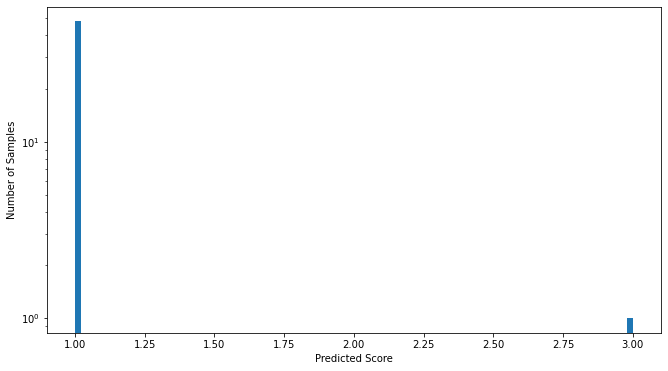

In [13]:
import matplotlib.pyplot as plt
p = np.argmax(model.predict(X_test), axis=1) + 1
plt.figure(figsize=(11,6))
plt.hist(p, bins=100);
plt.xlabel('Predicted Score');
plt.ylabel('Number of Samples');
plt.semilogy();

In [14]:
results = model.evaluate(X_test, y_test, batch_size=128)
print(f"Evaluating {y_test.shape} features")
print("test loss, test acc:", results)

1/1 [==============================] - 5s 5s/step - loss: 6.2170 - accuracy: 0.6939
Evaluating (49,) features
test loss, test acc: [6.217000961303711, 0.6938775777816772]


In [15]:
y_test + 1

array([2, 0, 0, 2, 0, 3, 0, 0, 2, 2, 0, 0, 1, 3, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0])

In [16]:
p + 1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])